In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
import timeit
import matplotlib.pyplot as plt
import keras
#from PIL import Image
from scipy import ndimage as ndi
from skimage import feature
from spectrum import *
from pylab import *
from PIL import Image


In [48]:
sigmas = [1.6]#, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8];
alphas = [0.1]#, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9];	

widths = [30]#, 30];
noises = [100]#, 3, 4, 5, 10, 20, 30, 50, 100, 200];

df = pd.DataFrame(columns = ['filename_orignal','filename_noisy','image_orig_ler','image_noisy_ler'])
NFFT_VAL = 1024
range_psd = int(NFFT_VAL/2)
spectrum_data = {}
spectrum_data_im_orig = {}
spectrum_data_im_noisy = {}


def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx],idx

Validation_count:  1


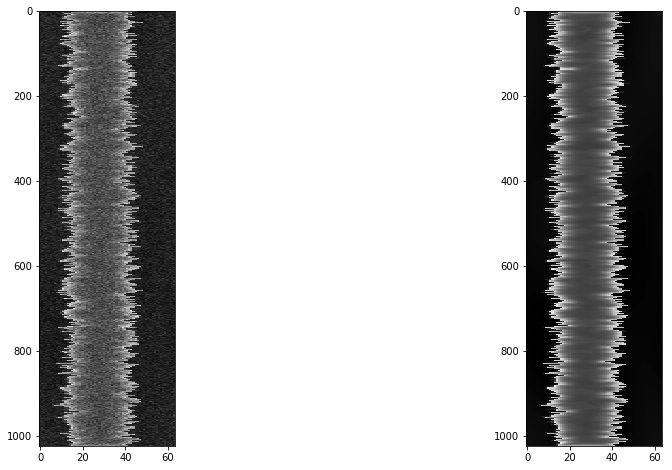

C:\Users\Sai Swaroop\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


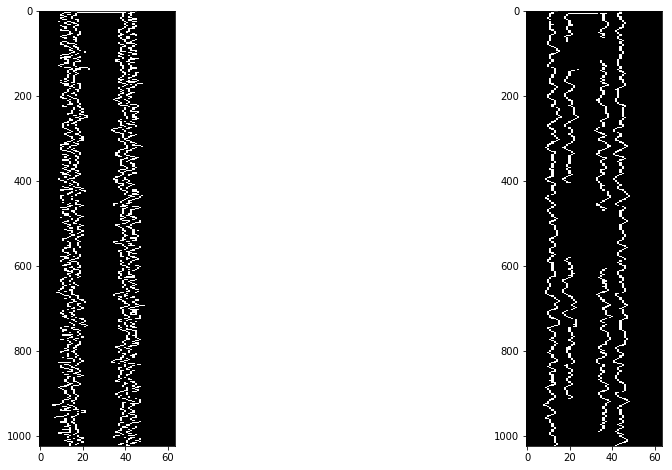

C:\Users\Sai Swaroop\Anaconda3\lib\site-packages\spectrum\mtm.py:529: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, np.complex) or
C:\Users\Sai Swaroop\Anaconda3\lib\site-packages\spectrum\mtm.py:530: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, np.complex))


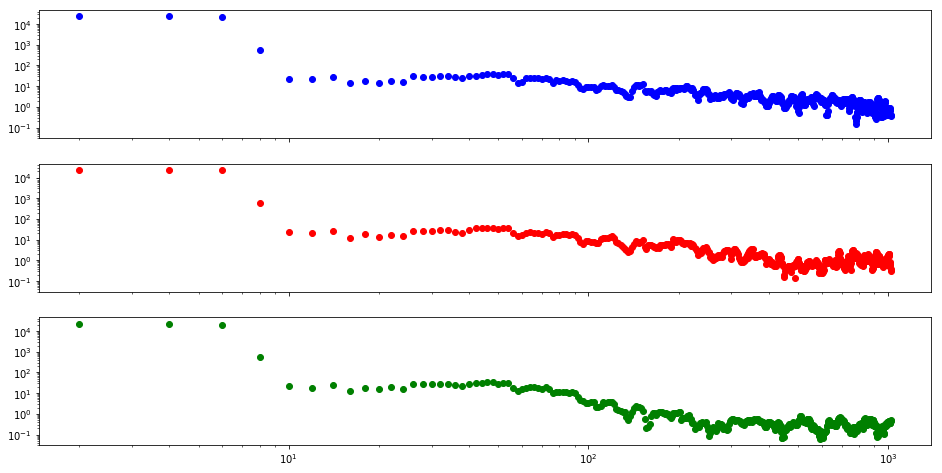

In [49]:
Xis = [10];
path_noisy = 'C:/courses/DirectedStudies/Datasets/noisy_images/';
path = 'C:/courses/DirectedStudies/Datasets/original_images/';
path_linescan ='C:/courses/DirectedStudies/Datasets/linescans/'; 
count = 0;
for sigma in sigmas:
    for alpha in alphas:
        for Xi in Xis:
            for width in widths:
                for s in [0]:
                    for noise in noises:
                        space = math.floor(width*2**s)
                        shift = math.floor(-25 + (width + space/2 + Xi + alpha*10 + sigma*10)%16)
                        
                        noisy_file_name ='nim_' +  "{0:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '_' + str(noise) + '.tiff';
                        noisy_file = path_noisy + 'noisy_images/nim_' + "{0:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '_' + str(noise) + '.tiff';
                        count = count  + 1
                        original_file_name = 'oim_'+ "{:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '.tiff'
                        original_file = path + 'original_images/oim_' + "{:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '_' + str(-shift) + '.tiff'
                        
                        linescan_file_name = 'linescan_'+ "{:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '.txt'
                        linescan_path = path_linescan + 'linescans/linescan_'+ "{:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '.txt'
                        
                        linescan_round_path = path_linescan + 'linescans_round/linescan_'+ "{:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '.txt'
                        
                        linescan_int_path = path_linescan + 'linescans_int/linescan_'+ "{:.2g}".format(sigma*1e-09) + '_' + str(alpha) + '_' + "{0:.2g}".format(Xi*1e-09) + '_' + str(width) + '_' + str(space) + '.txt'
                          
                        
                        
                        imnoisy = np.array(Image.open(noisy_file))
                        imoriginal = np.array(Image.open(original_file))
                        print('Validation_count: ',count)
                        mse_noisy = ((imoriginal - imnoisy) ** 2).mean();
                        
                        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
                        ax[0].imshow(imnoisy,cmap = 'gray',aspect= 0.2)
                        ax[1].imshow(imoriginal,cmap = 'gray',aspect= 0.2)
                        plt.show()
                        
                        linescan = []            
                        with open(linescan_path,'r') as f:
                            for i, line in enumerate(f):
                                if i < 3000:
                                    a, b = line.split(',')
                                    linescan.append(float(b))
                        
                        
                        linescan_round = []            
                        with open(linescan_round_path,'r') as f:
                            for i, line in enumerate(f):
                                if i < 3000:
                                    a, b = line.split(',')
                                    linescan_round.append(float(b))
                         

                        edges_im = feature.canny(imoriginal, sigma = 1)
                        edges_imnoisy = feature.canny(imnoisy, sigma = 3)
                        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
                        ax[0].imshow(edges_im,cmap = 'gray',aspect= 0.2)
                        ax[1].imshow(edges_imnoisy,cmap = 'gray',aspect= 0.2)
                        plt.show()
                        ledge_im = np.argmax(edges_im, axis = 1)[0:1023]
                        ledge_imnoisy = np.argmax(edges_imnoisy, axis = 1)[0:1023]
                        
                        
                        ler_im = ledge_im.astype(int).std()/2
                        ler_imnoisy = ledge_imnoisy.astype(int).std()/2
#                        df.loc[count] = [original_file_name,noisy_file_name,ler_im,ler_imnoisy];
#                        
                        linescan = linescan[:2048]
                        leftline = np.array(linescan[:1024]) 
                        rightline = linescan[1024:]
                        rightline.reverse()
                        rightline = np.array(rightline)
                        leftline = leftline + shift
                        rightline = rightline + shift
                        
                        
                        linescan_round = linescan_round[:2048]
                        leftline_round = np.array(linescan_round[:1024]) 
                        rightline_round = linescan_round[1024:]
                        rightline_round.reverse()
                        rightline_round = np.array(rightline_round)
                        leftline_round = leftline_round + shift
                        rightline_round = rightline_round + shift
                        
                        ler_orig = leftline.astype(int).std()/2
                        ler_round = leftline_round.astype(int).std()/2

                        err = np.absolute(ler_round -ler_orig)/ler_orig;     


                        mult_tape_spectrum = pmtm(leftline.astype(int),NFFT= NFFT_VAL,NW=4, k=6,method ='adapt', show = False)                                                                  
                        spectrum_data[linescan_file_name] = mult_tape_spectrum                                                
                        Sk = abs(mult_tape_spectrum[0])**2
                        Sk = np.mean(Sk * np.transpose(mult_tape_spectrum[1]), axis=0)
                        axis = np.arange(0,range_psd*2,2)
#                        plt.grid(fillstyle = 'full',alpha=0.2, which = 'major')
                        fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 8), sharex = True, sharey=True)
                        ax[0].loglog(axis,Sk[0:range_psd], 'bo')
                        psd_0 = Sk[0]
                        #plt.show()

                        mult_tape_spectrum_image = pmtm(ledge_im.round(),NFFT= NFFT_VAL,NW=4, k=6,method ='adapt', show = False)                                                                  
                        spectrum_data_im_orig[linescan_file_name] = mult_tape_spectrum_image                                                
                        Sk_orig = abs(mult_tape_spectrum_image[0])**2
                        Sk_orig = np.mean(Sk_orig * np.transpose(mult_tape_spectrum_image[1]), axis=0)
                        axis = np.arange(0,range_psd*2,2)
#                        plt.grid(fillstyle = 'full',alpha=0.2, which = 'major')
                        ax[1].loglog(axis,Sk_orig[0:range_psd], 'ro')
#                        plt.show()
                        psd_0_orig = Sk_orig[0]

                        mult_tape_spectrum_image_noisy = pmtm(ledge_imnoisy.round(),NFFT= NFFT_VAL,NW=4, k=6,method ='adapt', show = False)                                                                  
                        spectrum_data_im_noisy[linescan_file_name] = mult_tape_spectrum_image_noisy                                                
                        Sk_noisy = abs(mult_tape_spectrum_image_noisy[0])**2
                        Sk_noisy = np.mean(Sk_noisy * np.transpose(mult_tape_spectrum_image_noisy[1]), axis=0)
                        axis = np.arange(0,range_psd*2,2)
                        #plt.grid(fillstyle = 'full',alpha=0.2, which = 'major')
                        ax[2].loglog(axis,Sk_noisy[0:range_psd], 'go')
                        plt.show()
                        psd_0_noisy = Sk_noisy[0]


                        # Analysis 1
#                        print("PSD at index idx = ", Sk[idx])
#                        print("PSD at index idx-1 = ", Sk[idx-1])
#                        print("PSD at index idx-2 = ", Sk[idx-2])
#                        print("idx at which 3dB drop happens= ", idx-1 )
#                        print("nm equivalent of 3dB drop=" , axis[idx-1])
#                        print("predicted_Ki", predict_ki)
               

In [50]:
print("PSD_LINE =",psd_0 )
print("PSD_ORIG =",psd_0_orig )
print("PSD_NOiSY =",psd_0_noisy )

PSD_LINE = 24670.917235003784
PSD_ORIG = 23629.595591193505
PSD_NOiSY = 21472.648106820347


In [51]:

ledge_imnoisy

array([ 0, 13, 12, ..., 14, 14, 13], dtype=int64)

In [52]:
ledge_im

array([ 0, 15, 14, ..., 14, 14, 14], dtype=int64)